<a href="https://colab.research.google.com/github/irfanbykara/Numerical-Analysis/blob/main/Numerical_Analysis_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import math
from scipy import optimize
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
import scipy
import time 

print('Importing done...')

Importing done...


**# Task 1:**

In [22]:
def first_term(x,n):
  y_prime = 1/(1+x**2)
  for i in range(n+1):
    y_prime = y_prime.diff(x)
  f_derivative = lambdify(x, y_prime, 'numpy')
  solution = scipy.optimize.minimize_scalar(lambda x: -f_derivative(x), bounds=[-5,5], method='bounded')
  return f_derivative(solution.x) / math.factorial(n+1)


def zeros_of_Tn(n):
  
  res_list = list()
  for i in range(n+1):
    temp_res = np.cos(((2*i-1)*180)/2*n)

    res_list.append(temp_res)
    return res_list

def second_term_with_chebyshev(x,n):
  res = 1
  zeros = zeros_of_Tn(n)
  for val in zeros:
    res *= x - val
  return res


def second_term(x,n):
  res = 1
  start = -5 
  end = 5

  step = abs(start-end)/n
  val = start

  for i in range(n+1):
    res *= x-val
    val +=step
  return res


Lagrange Error With Equidistant Points:

152466698311.1392


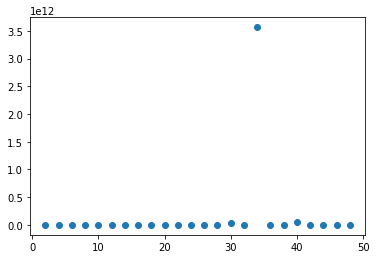

In [23]:
def lagrange_error(x,n):
  max_second_term = scipy.optimize.minimize_scalar(lambda x: -second_term(x,n), bounds=[-5,5], method='bounded')
  max_second_term_val = second_term(max_second_term.x,n)

  max_first_term_val = first_term(x,n)

  lagrange_error = max_first_term_val * max_second_term_val
  return lagrange_error

error_vals_list = list()

for i in range(2,49,2):
  error_val = lagrange_error(Symbol('x'),i)
  error_vals_list.append(error_val)


xpoints = list(range(2,49,2))
ypoints = error_vals_list

print(np.mean(error_vals_list))

plt.plot(xpoints, ypoints, 'o')
plt.show()


Lagrange Error with Zeros of Chebyshev:

0.7170193767569483


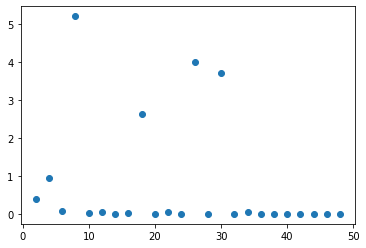

In [24]:
def lagrange_error_with_cheby(x,n):
  max_second_term = scipy.optimize.minimize_scalar(lambda x: -second_term_with_chebyshev(x,n), bounds=[-5,5], method='bounded')
  max_second_term_val = second_term_with_chebyshev(max_second_term.x,n)

  max_first_term_val = first_term(x,n)

  lagrange_error = max_first_term_val * max_second_term_val
  return lagrange_error

error_vals_list = list()
for i in range(2,49,2):
  error_val = lagrange_error_with_cheby(Symbol('x'),i)
  error_vals_list.append(error_val)


xpoints = list(range(2,49,2))
ypoints = error_vals_list

print(np.mean(error_vals_list))
plt.plot(xpoints, ypoints, 'o')
plt.show()


Comments for Task 1: As it can be clearly seen using zeros of chebyshev instead of equidistant points as the knots of the interpolation helped us deal with Runge's phenomenon. The mean value of the error terms of the chebyshev example was significantly less than the equidistant points example.*italik metin*

**Task 2:**

In [25]:
def spline_func(x,t):
  return np.sin(np.deg2rad(5*180*x))*np.cos(np.deg2rad(10*180*t)) + 2 * np.sin(np.deg2rad(7*180*x)) * np.sin(np.deg2rad(14*180*t))

In [26]:
def spline_func_derivative(x,t):
  return 5*np.pi* (np.cos(10*np.deg2rad(180)*t)*np.cos(5*np.deg2rad(180)*x)+14*np.pi*np.cos(14*np.deg2rad(180)*t)*np.cos(7*np.deg2rad(180)*x))


Linear Spline:

In [27]:
def linear_spline_interpolation(x,t):
  spline_func_list = list()
  for i in range(51):

    if i != 0:
      k = i/50
      l = (i-1) / 50
      sl = (k - x) / (k-l) * spline_func(l,t) + (x - l)/(k-l)*spline_func(k,t)
      spline_func_list.append(sl)
  return spline_func_list

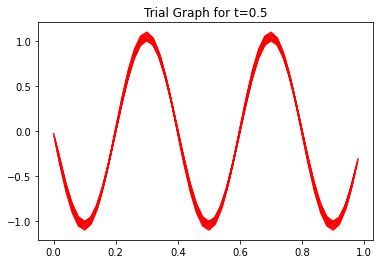

In [28]:
def plot_linear_spline(x,t):
  linear_func_list = linear_spline_interpolation(x, t)
  x_list = list()
  y_list = list()
  for i in range(len(linear_func_list)):
    temp_func = lambdify(x, linear_func_list[i], 'numpy')  
    if i!=0:

      v = np.linspace((i-1)/50,i/50,10)
      x_list.append(v)
      y_list.append(temp_func(v))
  return x_list,y_list

x_list, y_list = plot_linear_spline(Symbol('x'),1/2)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
## This is a trial to see if the function interpolates correctly for t = 0.5
plt.title('Trial Graph for t=0.5')

plt.plot(x_list,y_list, 'r')
plt.show()

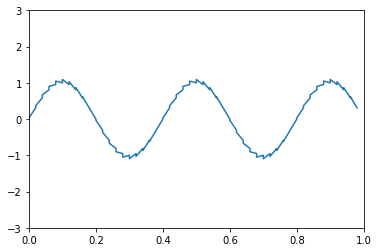

In [29]:
 
x,y = plot_linear_spline(Symbol('x'),0)
# enable interactive mode
plt.ion()
# creating subplot and figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(x[0], y[0])
plt.xlim([0,1])
plt.ylim([-3,3])


# You are not going to see this as an animation in the colab. Please checkout the video.
# looping
for i in range(51):
    x ,y= plot_linear_spline(Symbol('x'),i/50)

    # updating the value of x and y
    line1.set_xdata(x)
    line1.set_ydata(y)
 
    # re-drawing the figure
    fig.canvas.draw()
     
    # to flush the GUI events
    fig.canvas.flush_events()
    time.sleep(0.1)



Hermit Interpolation :

In [30]:
def hermite_cubic(x,t):
  hermite_func_list = list()
  for i in range(51):
    if i!=0:

      k = i/50
      l = (i-1)/50
      h = 1/50

      h0 = (x-k)**2/h**2 * (1+2/h*(x-l))
      k0 = (x-k)**2/h**2 * (x-l)
      h1 = (x-l)**2/h**2 * (1-2/h*(x-k))
      k1 = (x-l)**2/h**2 * (x-k)

      sh = h0 * spline_func(l,t) + spline_func_derivative(l,t) * k0 + h1 * spline_func(k,t) + k1 * spline_func_derivative(k,t)
      hermite_func_list.append(sh)
  return hermite_func_list

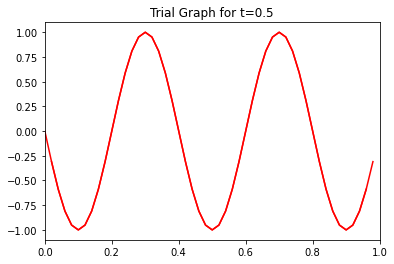

In [31]:
def plot_hermite_spline(x,t):
  hermite_func_list = hermite_cubic(x, t)
  temp_func_0 = lambdify(x, hermite_func_list[0], 'numpy')  

  x_list = list()
  y_list = list()  
  for i in range(len(hermite_func_list)):
    if i!=0:
      temp_func = lambdify(x, hermite_func_list[i-1], 'numpy')  

      v = np.array([(i-1)/50,i/50])
      x_list.append(v)
      y_list.append(temp_func(v))
  return x_list,y_list
                                     
x_list_1, y_list_1 = plot_hermite_spline(Symbol('x'),1/2 )

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlim([0,1])

## This is a trial to see if the function interpolates correctly for t = 0.5

plt.plot(x_list_1,y_list_1, 'r')
plt.title('Trial Graph for t=0.5')
plt.show()

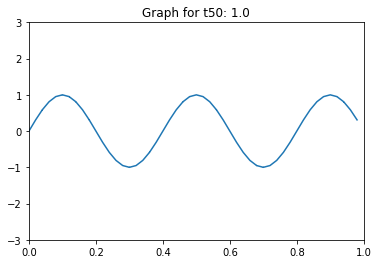

In [32]:
x,y = plot_hermite_spline(Symbol('x'),0)
# enable interactive mode
plt.ion()
# creating subplot and figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(x[0], y[0])

plt.xlim([0,1])
plt.ylim([-3,3])



 
# You are not going to see this as an animation in the colab. Please checkout the video.

# looping
for i in range(1,51):
    plt.title(f"Graph for t{i}: {i/50}")

    x ,y= plot_hermite_spline(Symbol('x'),i/50)

    # updating the value of x and y
    line1.set_xdata(x)
    line1.set_ydata(y)
 
    # re-drawing the figure
    fig.canvas.draw()
     
    # to flush the GUI events
    fig.canvas.flush_events()
    time.sleep(0.1)



Cubic Spline :

In [33]:
from typing import Tuple, List
import bisect

def compute_changes(x: List[float]) -> List[float]:
    return [x[i+1] - x[i] for i in range(len(x) - 1)]

def create_tridiagonalmatrix(n: int, h: List[float]) -> Tuple[List[float], List[float], List[float]]:
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C

def create_target(n: int, h: List[float], y: List[float]):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0]

def solve_tridiagonalsystem(A: List[float], B: List[float], C: List[float], D: List[float]):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B)

    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)):
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1])

    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1]

    return X

def compute_spline(x: List[float], y: List[float]):
    n = len(x)
    if n < 3:
        raise ValueError('Too short an array')
    if n != len(y):
        raise ValueError('Array lengths are different')

    h = compute_changes(x)
    if any(v < 0 for v in h):
        raise ValueError('X must be strictly increasing')

    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)

    M = solve_tridiagonalsystem(A, B, C, D)

    coefficients = [[(M[i+1]-M[i])*h[i]*h[i]/6, M[i]*h[i]*h[i]/2, (y[i+1] - y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6), y[i]] for i in range(n-1)]

    def spline(val):
        idx = min(bisect.bisect(x, val)-1, n-2)
        z = (val - x[idx]) / h[idx]
        C = coefficients[idx]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]

    return spline

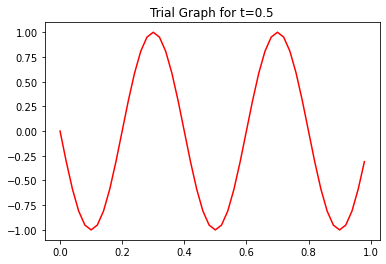

In [34]:
test_x = np.linspace(0,1,50)
test_y = spline_func(test_x,1/2)

spline = compute_spline(test_x, test_y)

for i, x in enumerate(test_x):
    assert abs(test_y[i] - spline(x)) < 1e-8, f'Error at {x}, {test_y[i]}'

x_vals = [v / 50 for v in range(0, 50, 1)]
y_vals = [spline(y) for y in x_vals]


## This is a trial to see if the function interpolates correctly for t = 0.5

plt.title('Trial Graph for t=0.5')

plt.plot(x_vals, y_vals,'r')


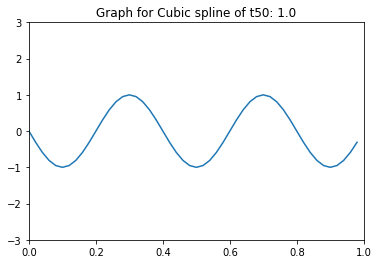

In [35]:
test_x = np.linspace(0,1,50)
test_y = spline_func(test_x,0)

spline = compute_spline(test_x, test_y)

for i, x in enumerate(test_x):
    assert abs(test_y[i] - spline(x)) < 1e-8, f'Error at {x}, {test_y[i]}'

x_vals = [v / 50 for v in range(0, 50, 1)]
y_vals = [-spline(y) for y in x_vals]

# enable interactive mode
plt.ion()
# creating subplot and figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(x_vals[0], y_vals[0])

# setting labels
plt.xlim([0,1])
plt.ylim([-3,3])


# You are not going to see this as an animation in the colab. Please checkout the video.
 
# looping
for i in range(1,51):
    plt.title(f"Graph for Cubic spline of t{i}: {i/50}")

    x = np.linspace(0,1,50)
    y = spline_func(test_x,i/50)
    spline = compute_spline(x, y)

    x_vals = [v / 50 for v in range(0, 50, 1)]
    y_vals = [-spline(y) for y in x_vals]
    # updating the value of x and y
    line1.set_xdata(x_vals)
    line1.set_ydata(y_vals)
 
    # re-drawing the figure
    fig.canvas.draw()
     
    # to flush the GUI events
    fig.canvas.flush_events()
    time.sleep(0.1)


Comments for Task 2: As it can be seen from the graphs, our interpolations approximated very well to our function for given values. Animated version of the graph for the t value from 0 to 50 can be found in the additional videos.



